# Visualizing geologic maps using shapefiles

From your GIS clases you remember that the shapefile format is a digital vector storage format for storing geographic location and associated attribute information.

It is now possible to plot shapefiles using Python. For this particular example we are using cartopy package and a pubicaly available shapefile from Geoscience Australia https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/32366. 

There are more shapefiles in this Geoscience Australia link https://www.ga.gov.au/data-pubs/Geoscientific-Datasets-and-Reports

##### You can look at how the geology of Mars and the Moon has plotted using a similar method in the following github repo
https://github.com/eleanorlutz/mars_geology_atlas_of_space


#This notebook shows how to:

- visualize and overlay the geological regions of Australia on a satelite image
- interrogate the geological regions of Australia
- colour-code and visualize a geological regions of Australia by age

In [1]:
#loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature


import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

#!pip3 install cmasher
#conda install cmasher
import cmasher as cmr


In [2]:
# shapefile's path
geo_units='./georegions/shapefiles/gregpldd.shp'

/Users/smor9448/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/smor9448/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/smor9448/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


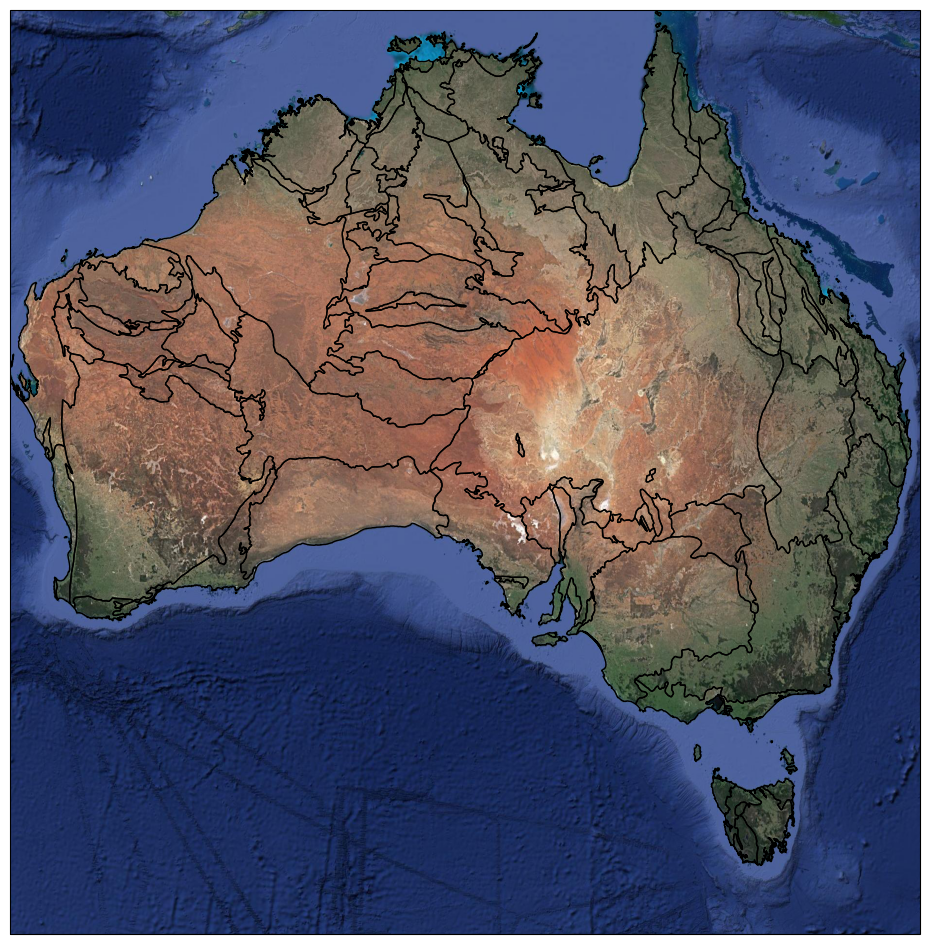

In [3]:
# Plot the shapefile without any colors
mapbox_satellite = cimgt.MapboxTiles(map_id='satellite', 
                                     access_token='pk.eyJ1IjoibG91aXNtb3Jlc2kiLCJhIjoiY2pzeG1mZzFqMG5sZDQ0czF5YzY1NmZ4cSJ9.lpsUzmLasydBlS0IOqe5JA')
google_maps_satellite = cimgt.GoogleTiles(style="satellite") 
google_maps_satellite = cimgt.GoogleTiles(style="satellite") 


lat0 =  -10; lat1 = -44; lon0 =  154; lon1 = 113
map_extent = [lon0, lon1, lat0, lat1]
map_tiles = mapbox_satellite
fig = plt.figure(figsize=(12, 12), facecolor="none")


# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)
ax.set_extent(map_extent)
ax.add_image(google_maps_satellite, 6)#10


shape_feature = ShapelyFeature(shpreader.Reader(geo_units).geometries(),
                                ccrs.PlateCarree(), facecolor='none')

ax.add_feature(shape_feature)
pass

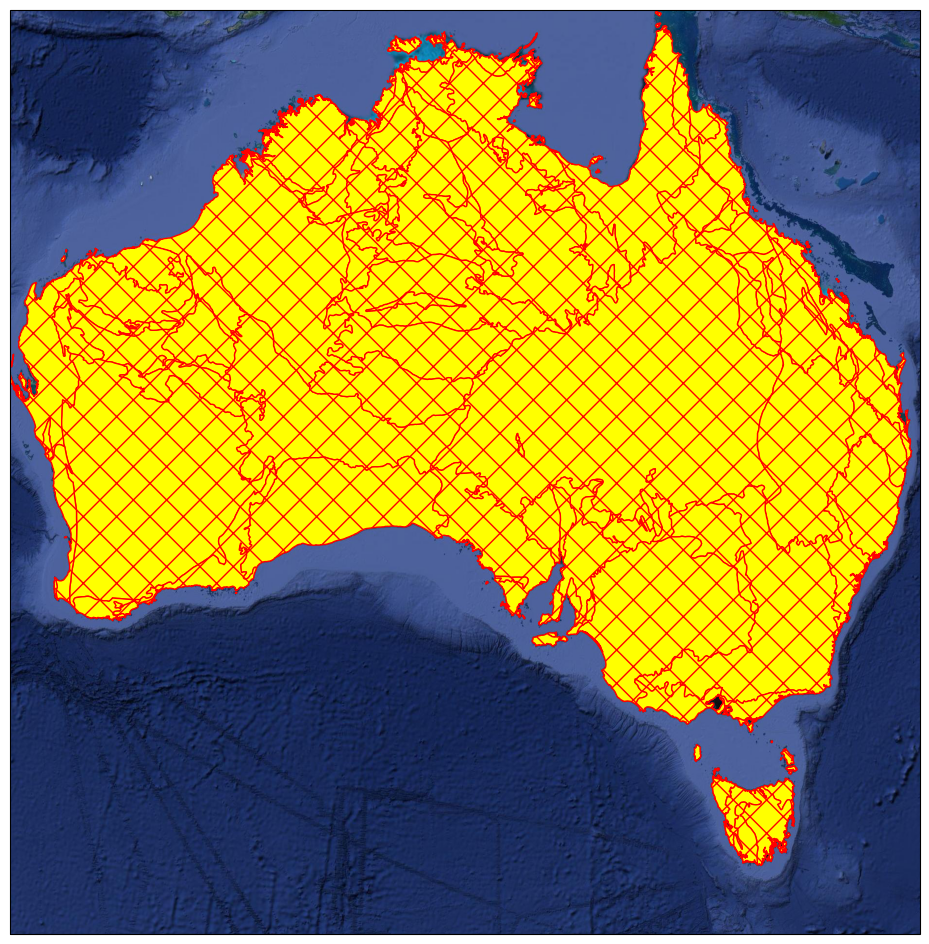

In [4]:
# Plot the shapefile with colors
mapbox_satellite = cimgt.MapboxTiles(map_id='satellite', 
                                     access_token='pk.eyJ1IjoibG91aXNtb3Jlc2kiLCJhIjoiY2pzeG1mZzFqMG5sZDQ0czF5YzY1NmZ4cSJ9.lpsUzmLasydBlS0IOqe5JA')
google_maps_satellite = cimgt.GoogleTiles(style="satellite") 
google_maps_satellite = cimgt.GoogleTiles(style="satellite") 


lat0 =  -10; lat1 = -44; lon0 =  154; lon1 = 113
map_extent = [lon0, lon1, lat0, lat1]
map_tiles = mapbox_satellite
fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)
ax.set_extent(map_extent)
ax.add_image(google_maps_satellite, 6)#10


shape_feature = ShapelyFeature(shpreader.Reader(geo_units).geometries(),
                                ccrs.PlateCarree(), facecolor='yellow', edgecolor='red', hatch='x')

ax.add_feature(shape_feature)


In [5]:
# why are the units not colour-coded?

# There’s more than one way to skin a cat
# ... and this is one way to do it

In [6]:
#In this case the attribute table of the shapefile has been saved in a .csv

#Loading the attribute table as a DataFrame (df)
df_attribute_tb= pd.read_csv('./georegions/gregldd.csv', header=0) 

#Let's look at the first five rows of the DataFrame that contains the attributes of the shapefile
df_attribute_tb.head(n=5) 


,FEATURE,UFI,REGNO,REGNAME,AGE_CLASS,MAIN_AGE,APROX_AREA,LANDFORMS,STRATIG,IGNEOUS,REG_META,DEFORMATN,MINDEPS,GEODX_REF
0,GR_UNIT,1,18,Torres Strait Region,Palaeozoic,Late Carboniferous to Early Permian,1000,Rocky islands; narrow plains; low hills,Late Carboniferous felsic volcanics (ignimbri...,Late Carboniferous felsic volcanics; Late Carb...,None,Moderate faulting,Major gold deposit; minor deposits of lode gol...,98/29073
1,GR_UNIT,2,18,Torres Strait Region,Palaeozoic,Late Carboniferous to Early Permian,1000,Rocky islands; narrow plains; low hills,Late Carboniferous felsic volcanics (ignimbri...,Late Carboniferous felsic volcanics; Late Carb...,None,Moderate faulting,Major gold deposit; minor deposits of lode gol...,98/29073
2,GR_UNIT,3,18,Torres Strait Region,Palaeozoic,Late Carboniferous to Early Permian,1000,Rocky islands; narrow plains; low hills,Late Carboniferous felsic volcanics (ignimbri...,Late Carboniferous felsic volcanics; Late Carb...,None,Moderate faulting,Major gold deposit; minor deposits of lode gol...,98/29073
3,GR_UNIT,4,18,Torres Strait Region,Palaeozoic,Late Carboniferous to Early Permian,1000,Rocky islands; narrow plains; low hills,Late Carboniferous felsic volcanics (ignimbri...,Late Carboniferous felsic volcanics; Late Carb...,None,Moderate faulting,Major gold deposit; minor deposits of lode gol...,98/29073
4,GR_UNIT,5,18,Torres Strait Region,Palaeozoic,Late Carboniferous to Early Permian,1000,Rocky islands; narrow plains; low hills,Late Carboniferous felsic volcanics (ignimbri...,Late Carboniferous felsic volcanics; Late Carb...,None,Moderate faulting,Major gold deposit; minor deposits of lode gol...,98/29073


In [7]:
#What are the column names of the DataFrame?
df_attribute_tb.columns

Index(['FEATURE', 'UFI', 'REGNO', 'REGNAME', 'AGE_CLASS', 'MAIN_AGE',
       'APROX_AREA', 'LANDFORMS', 'STRATIG', 'IGNEOUS', 'REG_META',
       'DEFORMATN', 'MINDEPS', 'GEODX_REF'],
      dtype='object')

In [8]:
#Let's look at the age categories of the attribute AGE_CLASS
#To do that we can use the function *unique*
print(df_attribute_tb.AGE_CLASS.unique())
len(df_attribute_tb.AGE_CLASS.unique())

['Palaeozoic' 'Mesozoic to Cainozoic' 'Mesozoic' 'Archaean to Proterozoic'
 'Proterozoic' 'Proterozoic to Palaeozoic' 'Palaeozoic to Mesozoic'
 'Archaean' 'Palaeozoic to Cainozoic' 'Cainozoic'
 'Proterozoic to Mesozoic']


11

In [9]:
# Now let's make a list of colours, so that we can assign a specific colour for each age category
#making a list of colors based on the color map *Accent*
colors = np.array(cmr.take_cmap_colors('rainbow', len(df_attribute_tb.AGE_CLASS.unique()), cmap_range=(0.2, 0.8), return_fmt='hex'))
colors

array(['#1996F3', '#04B9EA', '#24D8DF', '#42EDD3', '#60FAC5', '#80FFB4',
       '#9EFAA2', '#BCED8F', '#DBD87B', '#FBB965', '#FF964F'], dtype='<U7')

In [10]:
#creating a data frame with the colors and the ages
geologic_key=pd.DataFrame({'color':colors,'ages':df_attribute_tb.AGE_CLASS.unique()})
geologic_key

,color,ages
0,#1996F3,Palaeozoic
1,#04B9EA,Mesozoic to Cainozoic
2,#24D8DF,Mesozoic
3,#42EDD3,Archaean to Proterozoic
4,#60FAC5,Proterozoic
5,#80FFB4,Proterozoic to Palaeozoic
6,#9EFAA2,Palaeozoic to Mesozoic
7,#BCED8F,Archaean
8,#DBD87B,Palaeozoic to Cainozoic
9,#FBB965,Cainozoic


In [11]:
#saving that data frame in a csv file
geologic_key.to_csv('./geologic_key.csv',columns=['color', 'ages'], sep=',', index=False )


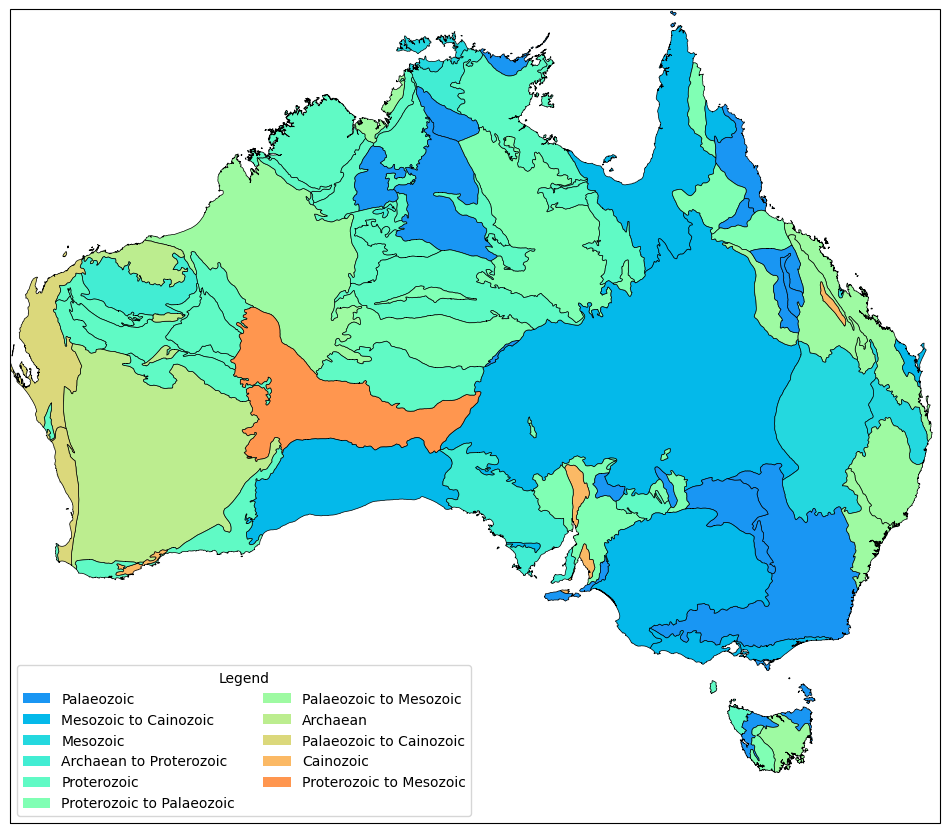

In [12]:
#shapefile's path
geo_units='./georegions/shapefiles/gregpldd.shp'

#accessing the contents of a shapefile
shp = shpreader.Reader(geo_units)

#loading the geologic_key we created earlier
df = pd.read_csv('./geologic_key.csv', header=0, index_col='ages')

#defining the figure and its size
fig = plt.figure(figsize=(12, 12))

#defining the figure extent and projection
lat0 =  -10; lat1 = -44; lon0 =  154; lon1 = 113
ax = plt.axes(projection=ccrs.PlateCarree())
map_extent = [lon0, lon1, lat0, lat1]
ax.set_extent(map_extent)

#
for record, state in zip(shp.records(), shp.geometries()):
        name = record.attributes['AGE_CLASS'] 
        facecolor = df.loc[name]['color']
        ax.add_geometries([state], ccrs.PlateCarree(), facecolor=facecolor, edgecolor='black', linewidth=0.5)
# ax.add_image(google_maps_satellite, 6)#10

        
legend_c=[]
for i in colors:
    legend_c.append(mpatches.Rectangle((0, 0), 1, 0.1, linewidth=1,  facecolor=i))

ax.legend(legend_c, list(geologic_key.ages),loc='lower left', fancybox=True, title='Legend', ncol=2)
pass

# Task : Build a map of the location of your Honour's project

- Create a multi-pane map
- Plot geospatial data (datapoints, geologic maps, rasters) The world is your oyster!
- Create a legend 
- Do a scatter plot or a time series that shows an important relationship for the topic of your Honour's project
- Write figure captions for the map and scatter plot in a markdown cell
